# To Predict the Price of House based on independent features

# Loading the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target
sns.set_style('whitegrid')
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#Added a column with the pre existing model


features['Price'] = targets

In [4]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
#Now We are checking how many are missing values
#False - Not Null
#True - Null

features.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
total_null_EachColumn = features.isnull().sum().sort_values(ascending=False)
total_null_EachColumn

Price      0
LSTAT      0
B          0
PTRATIO    0
TAX        0
RAD        0
DIS        0
AGE        0
RM         0
NOX        0
CHAS       0
INDUS      0
ZN         0
CRIM       0
dtype: int64

<AxesSubplot:>

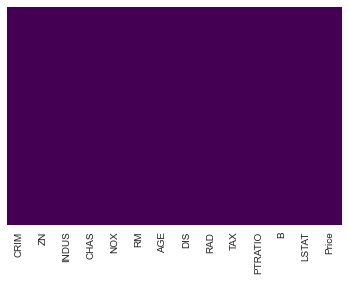

In [7]:
sns.heatmap(features.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<h4>Not a single column is containg a null or nan value</h4>


In [8]:
#Checking the data types of each column
features.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

<h3>All columns are of numerial data types</h3>

<p>Heatmap to check the correlation between all independent features and the target feature</p>

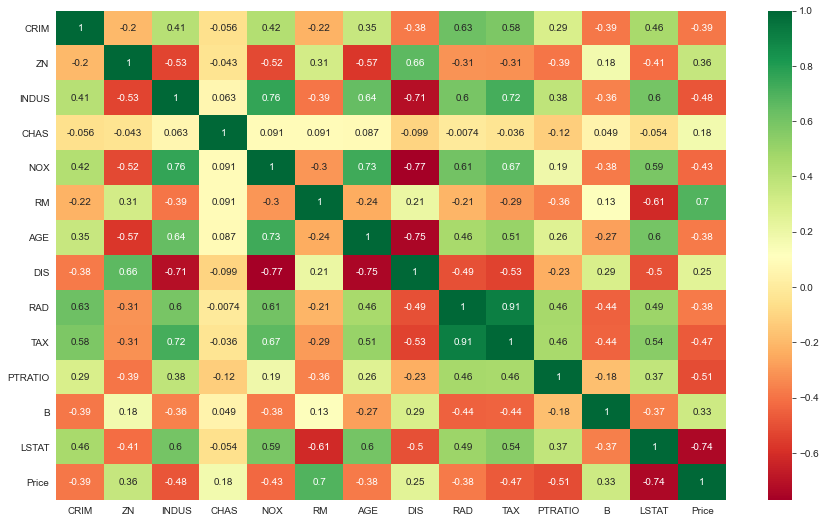

In [9]:
corrmat = features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,9))
g = sns.heatmap(features[top_corr_features].corr(),annot=True,cmap='RdYlGn')

<h3>Analysis</h3><br>
1.The Feature RM is having strong positive corelation of 0.7 with the price feature<br>
2.The Feature LSTAT is having negative corelation of -0.74 with the price feature<br>
3.The PTRATIO is also having negative corelation of -0.51 with the price feature<br>

The Missing values is zero.In otherwords not a sinle column is empty 

In [10]:
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [12]:
NewFeatures = features[['RM','PTRATIO','LSTAT']]
NewTarget = features['Price']

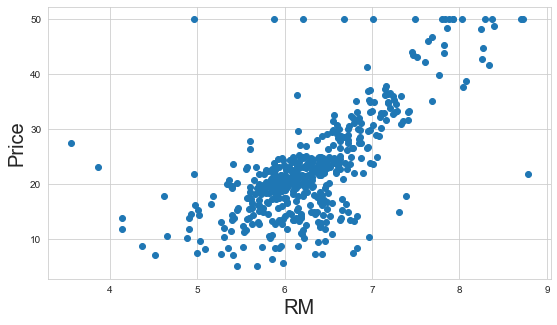

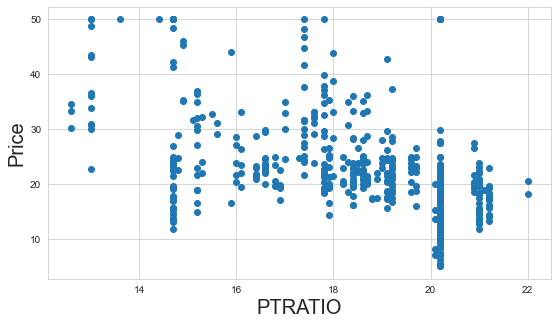

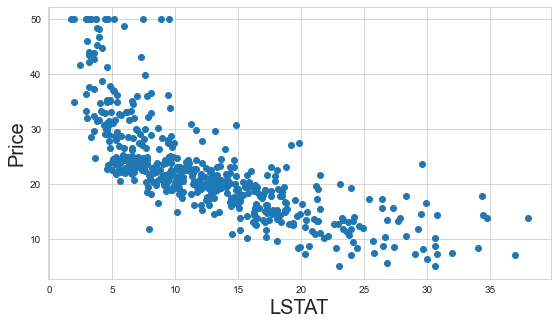

In [13]:
for index, feature_name in enumerate(NewFeatures.columns):
    plt.figure(figsize=(9, 5))
    plt.scatter(NewFeatures[feature_name], NewTarget)
    plt.ylabel('Price', size=20)
    plt.xlabel(feature_name, size=20)
    plt.show()

1.From the above graph of RM and Price we can see that average number of rooms per dwelling increasing the price of houses in boston is also increasing.<br>

2.From the above graph of PTRATIO vs Price we can see that pupil-teacher ratio is increasing then the price of houses in boston is also decreasing.<br>

3.From the above graph of LSTAT vs Price we can see that the Percentage of lower status of the population in boston is very  high and due to low status people the price is getting decreased

In [14]:
X = NewFeatures
Y = NewTarget

In [15]:
X

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33
...,...,...,...
501,6.593,21.0,9.67
502,6.120,21.0,9.08
503,6.976,21.0,5.64
504,6.794,21.0,6.48


# Building Linear Regression Model

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 3)
(167, 3)
(339,)
(167,)


Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

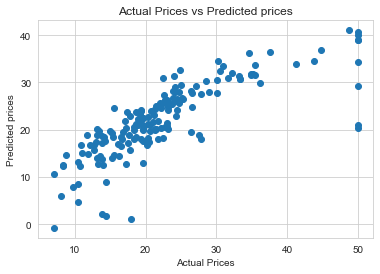

In [17]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_train_prediction = lm.predict(X_train)
Y_test_prediction = lm.predict(X_test)

plt.scatter(Y_test, Y_test_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")

Text(0, 0.5, 'count')

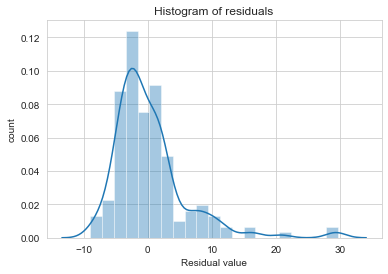

In [18]:
resids = np.subtract(Y_test,Y_test_prediction)
sns.distplot(resids)
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('count')

In [21]:
print("The model performance for training set-------")
print("Mean squared error: ",sklearn.metrics.mean_squared_error(Y_train, Y_train_prediction))
print("R Square: ",sklearn.metrics.r2_score(Y_train, Y_train_prediction))


print("The model performance for testing set-------")
print("Mean squared error: ",sklearn.metrics.mean_squared_error(Y_test, Y_test_prediction))
print("R Square: ",sklearn.metrics.r2_score(Y_test, Y_test_prediction))

The model performance for training set-------
Mean squared error:  24.005791734592204
R Square:  0.699273941980035
The model performance for testing set-------
Mean squared error:  33.77154581277513
R Square:  0.6397465739421646


# Conclusion

We build the model to predict the price of boston house by using the linear regression and we also computed The R square of training and testing sets which are very closed.